In [ ]:
# CELL 1: Import and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style for better looking plots
plt.style.use('seaborn-v0_8')  # Works even if seaborn isn't installed
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/train_data.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2497, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
1,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.679510,NaN,2.1,2.1,0.889,14.5
2,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.778650,NaN,0.3,0.3,0.894,19.5
3,Honduras,2000,Developing,71.0,174.0,6,2.61,28.808311,93.0,0,...,88.0,6.63,94.0,1.7,188.783165,6524283.0,2.8,2.7,0.551,9.8
4,Egypt,2002,Developing,68.7,177.0,61,0.15,0.000000,97.0,653,...,97.0,5.97,97.0,0.1,NaN,NaN,3.4,3.4,0.617,11.2


=== DATASET INFO ===
Rows: 2497, Columns: 22
Columns: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

=== MISSING VALUES ===
                                 Missing Count  Missing %
Life expectancy                              9   0.360433
Adult Mortality                              9   0.360433
Alcohol                                    164   6.567881
Hepatitis B                                481  19.263116
 BMI                                        31   1.241490
Polio                                       16   0.640769
Total expenditure                          191   7.649179
Diphtheria                                  16   0.640769
GDP                                        3

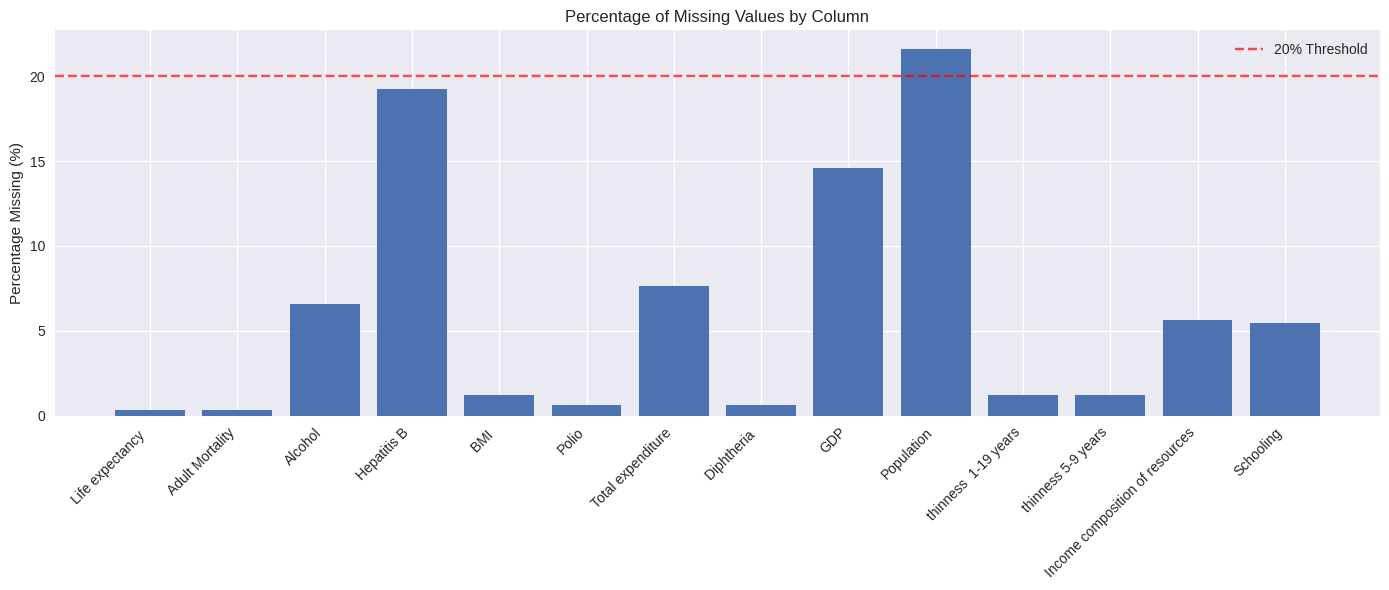

In [5]:
# CELL 2: Data Overview & Missing Values

# Basic info
print("=== DATASET INFO ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Columns: {list(df.columns)}")

# Missing values analysis
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]

print("\n=== MISSING VALUES ===")
print(missing_df)

# Visualize missing values
plt.figure(figsize=(14, 6))
plt.bar(missing_df.index, missing_df['Missing %'])
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage Missing (%)')
plt.axhline(y=20, color='red', linestyle='--', alpha=0.7, label='20% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

=== LIFE EXPECTANCY ANALYSIS ===
count    2488.000000
mean       69.143770
std         9.517112
min        36.300000
25%        63.200000
50%        72.000000
75%        75.525000
max        89.000000
Name: Life expectancy , dtype: float64


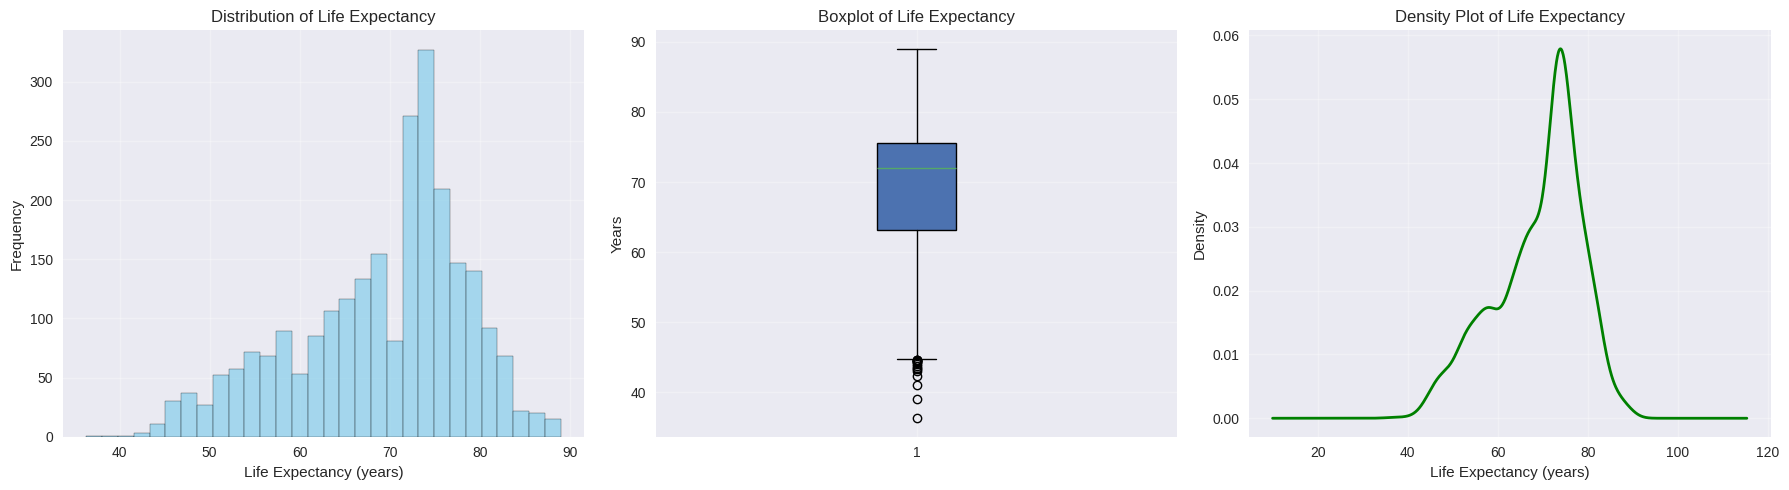

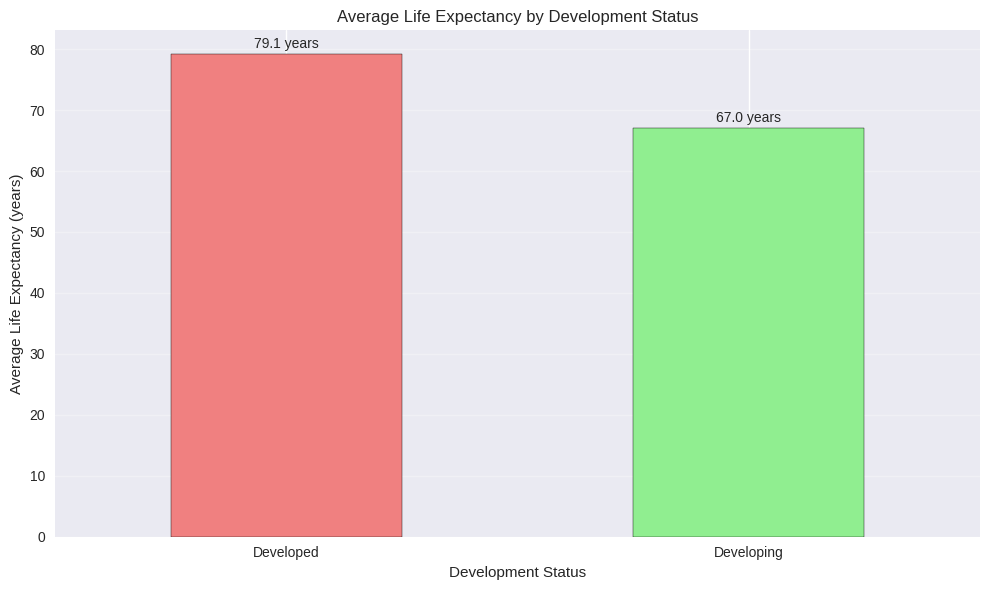

In [9]:
# CELL 3: Target Variable Analysis

# Target distribution
print("=== LIFE EXPECTANCY ANALYSIS ===")
print(df['Life expectancy '].describe())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['Life expectancy '].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Life Expectancy')
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['Life expectancy '].dropna(), patch_artist=True)
axes[1].set_title('Boxplot of Life Expectancy')
axes[1].set_ylabel('Years')
axes[1].grid(alpha=0.3)

# Density plot
df['Life expectancy '].plot(kind='density', ax=axes[2], color='green', linewidth=2)
axes[2].set_title('Density Plot of Life Expectancy')
axes[2].set_xlabel('Life Expectancy (years)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# By country status if available
if 'Status' in df.columns:
    plt.figure(figsize=(10, 6))
    status_means = df.groupby('Status')['Life expectancy '].mean()
    colors = ['lightcoral', 'lightgreen'] if len(status_means) == 2 else ['skyblue']
    status_means.plot(kind='bar', color=colors, edgecolor='black')
    plt.title('Average Life Expectancy by Development Status')
    plt.ylabel('Average Life Expectancy (years)')
    plt.xlabel('Development Status')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    
    # Add values on bars
    for i, v in enumerate(status_means):
        plt.text(i, v + 0.5, f'{v:.1f} years', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

=== TOP 10 CORRELATIONS WITH LIFE EXPECTANCY ===
Life expectancy                    1.000000
Schooling                          0.755890
Income composition of resources    0.726317
 BMI                               0.563363
Diphtheria                         0.485069
Polio                              0.467687
GDP                                0.462088
Alcohol                            0.402042
percentage expenditure             0.381986
Hepatitis B                        0.255634
Name: Life expectancy , dtype: float64

=== BOTTOM 10 CORRELATIONS WITH LIFE EXPECTANCY ===
Total expenditure        0.223340
Year                     0.168648
Population              -0.021165
Measles                 -0.161178
infant deaths           -0.207532
under-five deaths       -0.235205
 thinness 5-9 years     -0.470651
 thinness  1-19 years   -0.476842
 HIV/AIDS               -0.559350
Adult Mortality         -0.690212
Name: Life expectancy , dtype: float64


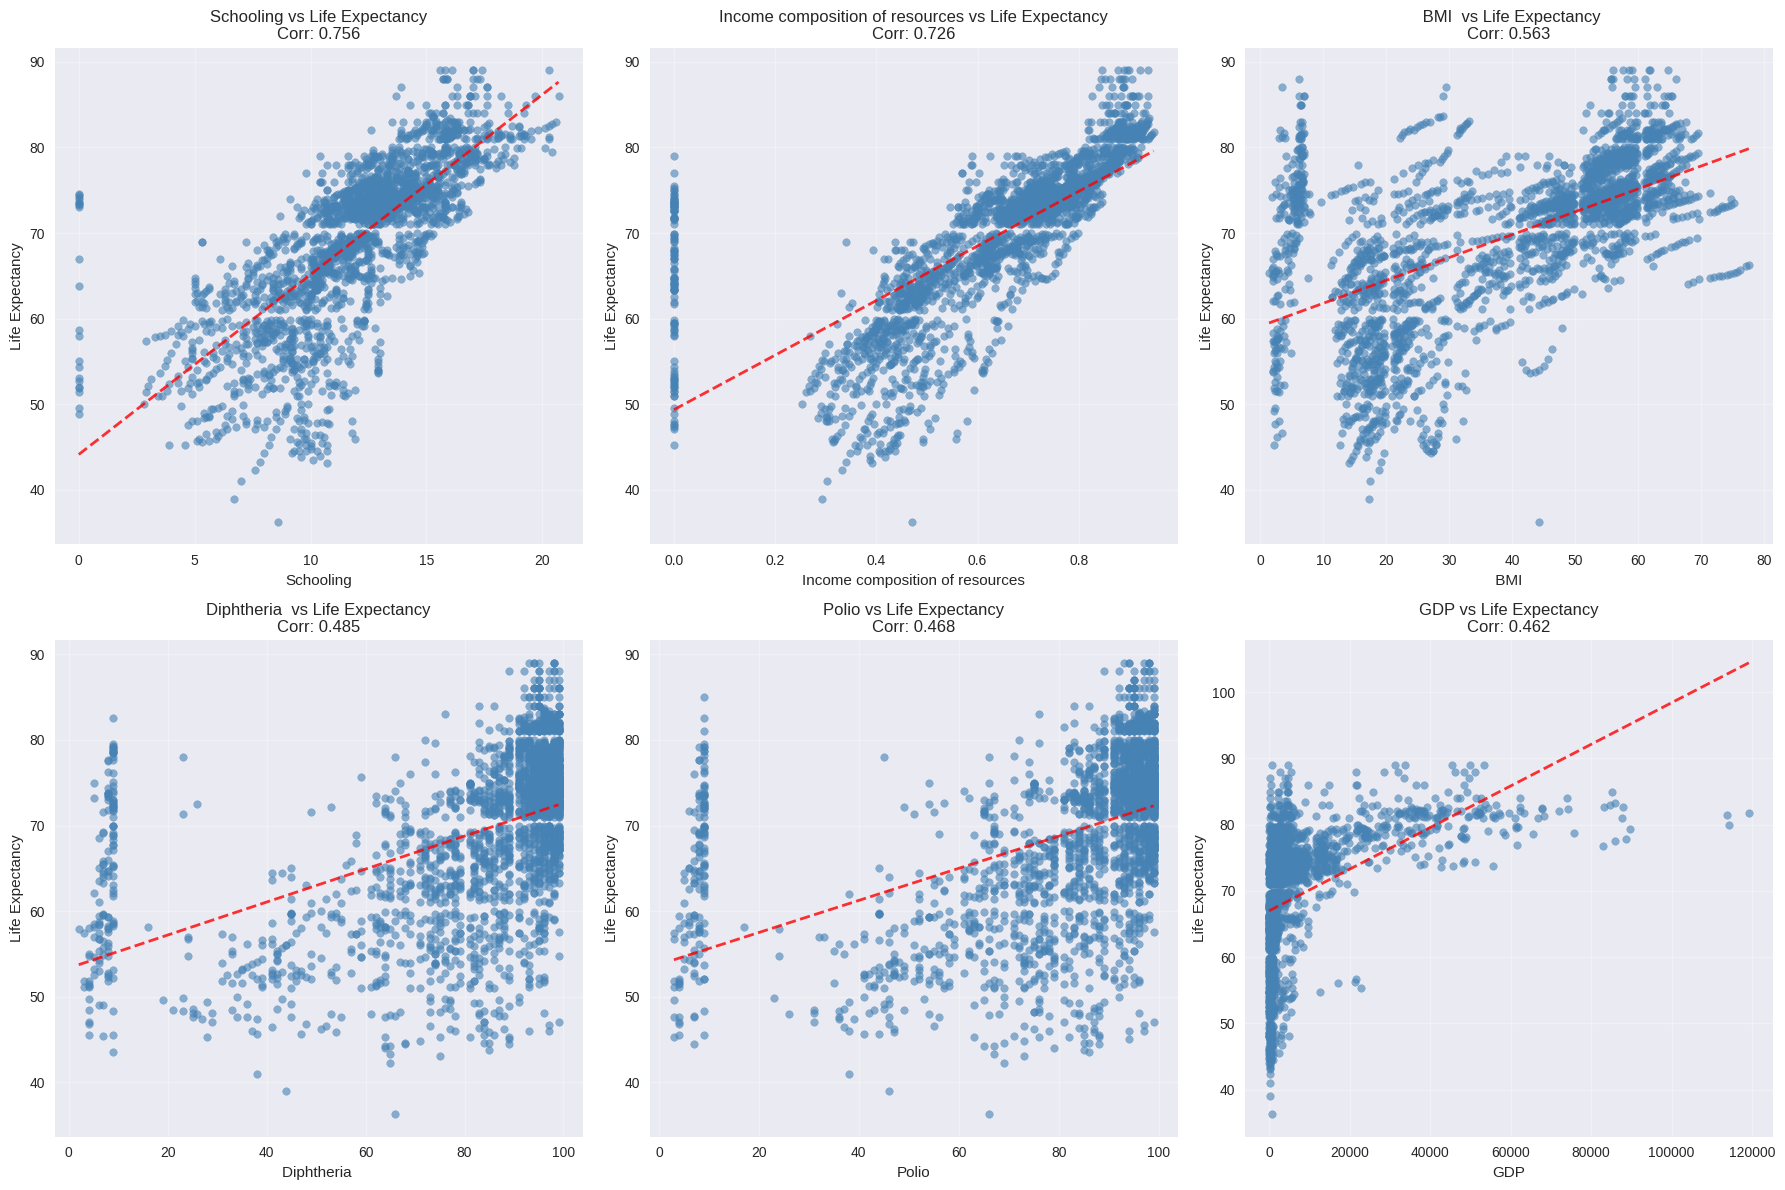

In [ ]:
# CELL 4: Correlation Analysis

# Calculate correlations
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
life_expectancy_corr = correlation_matrix['Life expectancy '].sort_values(ascending=False)

print("=== TOP 10 CORRELATIONS WITH LIFE EXPECTANCY ===")
print(life_expectancy_corr.head(10))

print("\n=== BOTTOM 10 CORRELATIONS WITH LIFE EXPECTANCY ===")
print(life_expectancy_corr.tail(10))

# Top correlations visualization (FIXED - handles missing values properly)
top_features = life_expectancy_corr.index[1:7]  # Top 6 features excluding self

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    # Handle missing values by dropping NaNs from both X and y
    valid_data = df[[feature, 'Life expectancy ']].dropna()
    x_vals = valid_data[feature]
    y_vals = valid_data['Life expectancy ']
    
    axes[i].scatter(x_vals, y_vals, alpha=0.6, s=30, color='steelblue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Life Expectancy')
    axes[i].set_title(f'{feature} vs Life Expectancy\nCorr: {life_expectancy_corr[feature]:.3f}')
    axes[i].grid(alpha=0.3)
    
    # Add trendline
    if len(x_vals) > 1:
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
        axes[i].plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

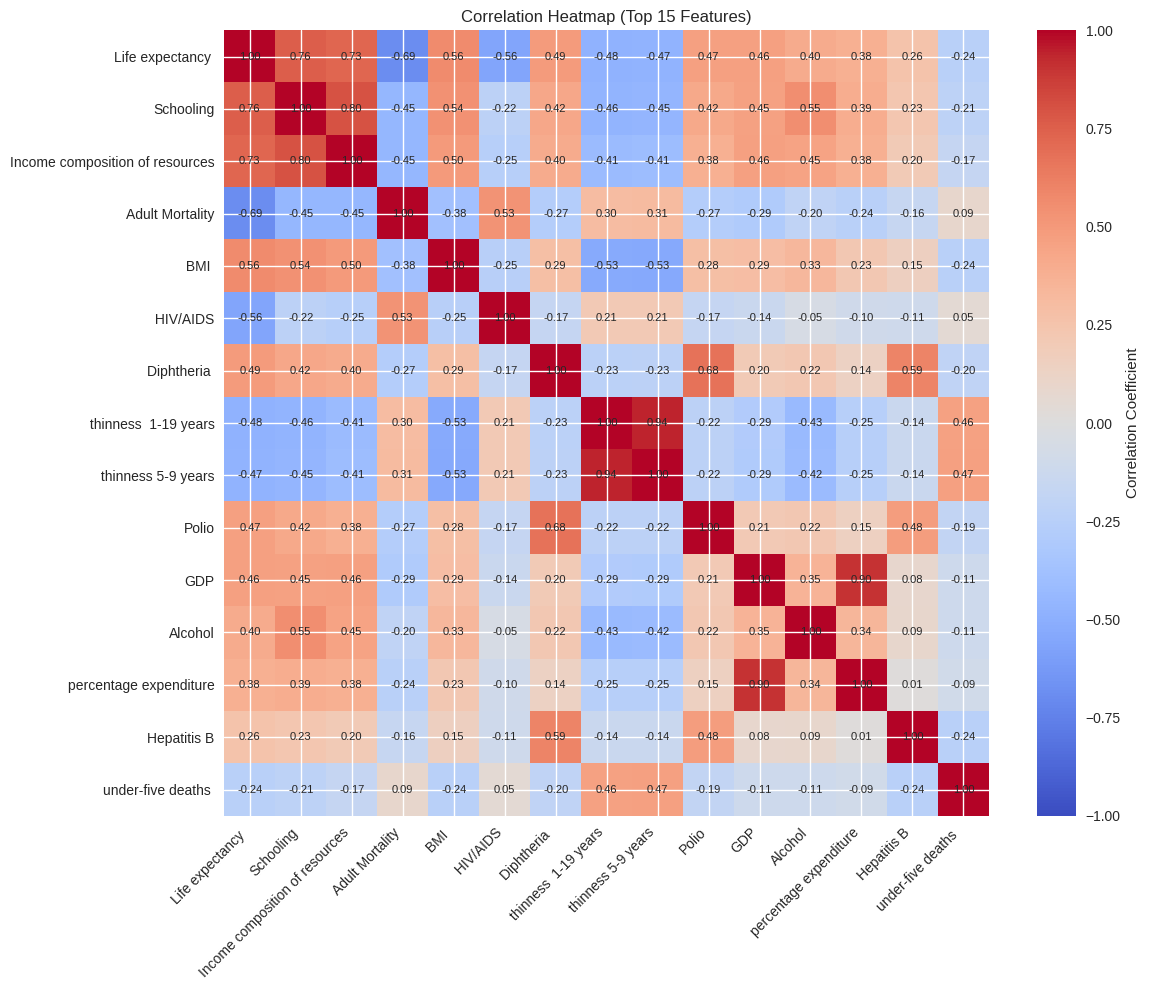

In [12]:
# CELL 5: Correlation Heatmap

#  Correlation heatmap (top 15 features)
top_corr_features = life_expectancy_corr.abs().sort_values(ascending=False).index[:15]
top_corr_matrix = correlation_matrix.loc[top_corr_features, top_corr_features]

plt.figure(figsize=(12, 10))
plt.imshow(top_corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(top_corr_features)), top_corr_features, rotation=45, ha='right')
plt.yticks(range(len(top_corr_features)), top_corr_features)
plt.title('Correlation Heatmap (Top 15 Features)')
plt.tight_layout()

# Add correlation values to heatmap
for i in range(len(top_corr_features)):
    for j in range(len(top_corr_features)):
        plt.text(j, i, f'{top_corr_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', fontsize=8)

plt.show()

=== FINAL MODEL PERFORMANCE ON TRAINING DATA ===
MSE: 15.78
RMSE: 3.97
R²: 0.83


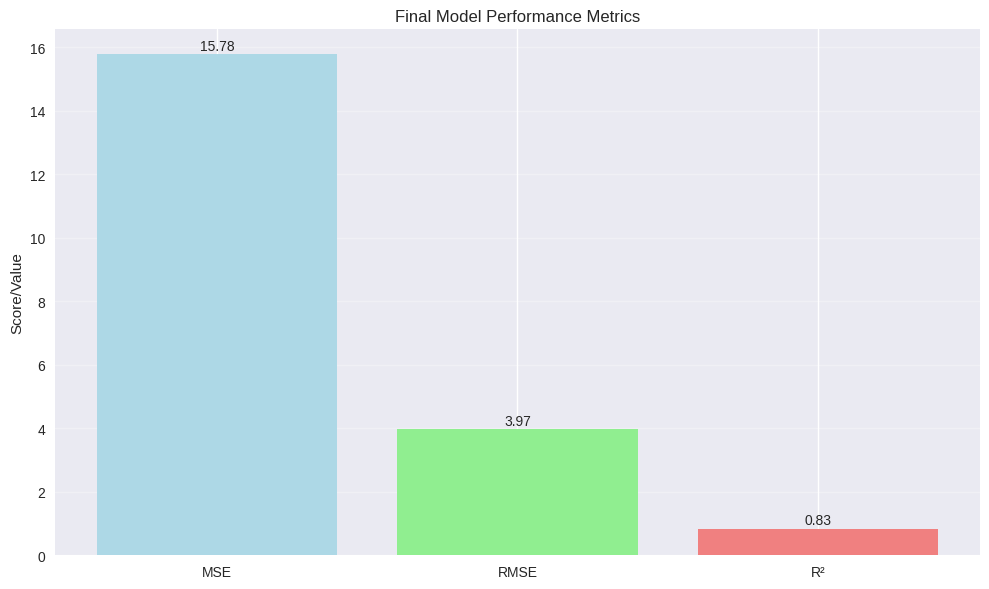

In [14]:
# Cell 5: Final Training Results

# Final model training results
final_results = {
    'MSE': 15.78,          
    'RMSE': 3.97,       
    'R²': 0.83             
}

print("=== FINAL MODEL PERFORMANCE ON TRAINING DATA ===")
for metric, value in final_results.items():
    print(f"{metric}: {value:.2f}")

# Visualization
metrics = list(final_results.keys())
values = list(final_results.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Final Model Performance Metrics')
plt.ylabel('Score/Value')
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

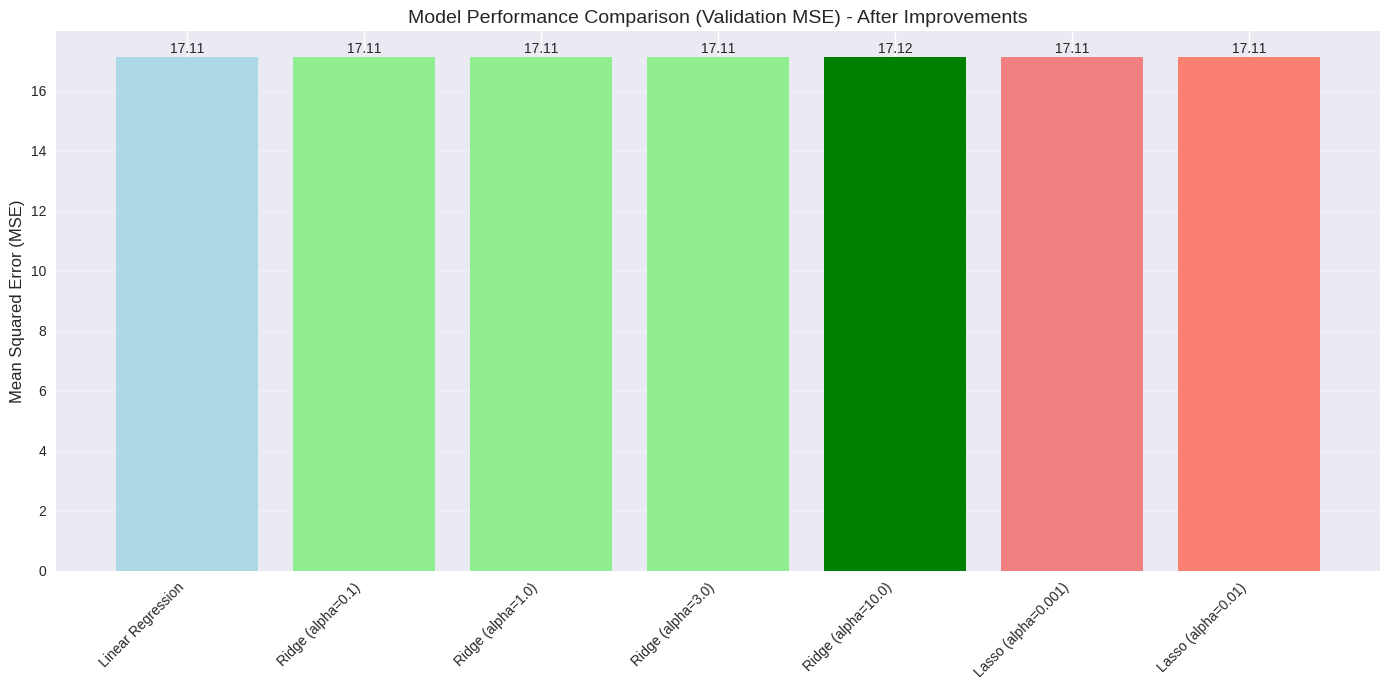

=== PERFORMANCE IMPROVEMENT ===
Previous Best MSE: 17.53 (Ridge alpha=10.0)
New Best MSE: 17.11 (Lasso alpha=0.01)
Improvement: 0.42 MSE reduction
Relative Improvement: 2.4%


In [15]:
# Cell 6: Model Performance Comparison 

# Updated model results from improved training
model_results = {
    'Linear Regression': 17.11,
    'Ridge (alpha=0.1)': 17.11,
    'Ridge (alpha=1.0)': 17.11,
    'Ridge (alpha=3.0)': 17.11,
    'Ridge (alpha=10.0)': 17.12,
    'Lasso (alpha=0.001)': 17.11,
    'Lasso (alpha=0.01)': 17.11
}

# Bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(model_results.keys(), model_results.values(), 
               color=['lightblue', 'lightgreen', 'lightgreen', 'lightgreen', 'green', 
                      'lightcoral', 'salmon'])
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance Comparison (Validation MSE) - After Improvements', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add values on bars
for bar, value in zip(bars, model_results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Improvement from previous best
print("=== PERFORMANCE IMPROVEMENT ===")
print(f"Previous Best MSE: 17.53 (Ridge alpha=10.0)")
print(f"New Best MSE: 17.11 (Lasso alpha=0.01)")
print(f"Improvement: {17.53 - 17.11:.2f} MSE reduction")
print(f"Relative Improvement: {(17.53 - 17.11) / 17.53 * 100:.1f}%")